In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving responses.csv to responses.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

data = io.BytesIO(uploaded['responses.csv'])

df = pd.read_csv('responses.csv', delimiter=',')

print('General info')
print(df.info())
print('Size of dataset')
print(df.size)

General info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
None
Size of dataset
151500


В наборе содержится статистика по 1010 опрошенным, 150 параметров.

In [ ]:
preferences = df.iloc[:, 31:31+32]
demographics = df.iloc[:, -10:]

In [ ]:
for col in preferences.columns:
  preferences[col].fillna(preferences[col].mode()[0], inplace=True)
preferences.select_dtypes(include='number').describe()

<ipython-input-117-3dcb7ee1dcf3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preferences[col].fillna(preferences[col].mode()[0], inplace=True)


,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
count,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,...,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,3.206931,3.137624,2.59505,2.330693,2.061386,4.179208,3.135644,2.635644,2.661386,2.153465,...,3.411881,3.298020,1.900990,2.359406,3.276238,3.232673,3.024752,4.559406,2.948515,3.341584
std,1.262304,1.255265,1.29395,1.352437,1.226643,0.920294,1.317872,1.348904,1.380953,1.376287,...,1.408124,1.504962,1.173755,1.270437,1.284940,1.278906,1.320112,0.736245,1.418874,1.545848
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.000000,1.00000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
50%,3.000000,3.000000,2.00000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,4.000000
75%,4.000000,4.000000,4.00000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,...,5.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


В предпочтениях мы видим лишь числовые признаки, которые выражены как категориальные (по сути, кодирование категориальных признаков). У некоторых из них значения Null — их можно заменить на самое популярное.

In [ ]:
for col in demographics.select_dtypes(include='number').columns:
  demographics[col].fillna(demographics[col].mean(), inplace=True)
demographics.select_dtypes(include='number').describe()

<ipython-input-118-ab89d8d9a6e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographics[col].fillna(demographics[col].mean(), inplace=True)


,Age,Height,Weight,Number of siblings
count,1010.000000,1010.000000,1010.000000,1010.000000
mean,20.433699,173.514141,66.405051,1.297809
std,2.819010,9.924657,13.701713,1.010331
min,15.000000,62.000000,41.000000,0.000000
25%,19.000000,167.000000,56.000000,1.000000
50%,20.000000,173.000000,65.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


Здесь пропуски в количественных признаках можно заменить уже на среднее арифметическое, поскольку признаки не являются закодированными категориальными.

In [ ]:
demographics.select_dtypes(exclude='number').describe()

,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1004,1007,1009,1008,1006,1006
unique,2,2,6,2,2,2
top,female,right handed,secondary school,no,city,block of flats
freq,593,906,621,754,707,595


In [ ]:
for col in demographics.columns:
    print(col)
    print(df[col].unique())

Age
[20. 19. 22. 18. 17. 24. 25. 27. 21. 23. 26. 28. 16. 15. nan 29. 30.]
Height
[163. 176. 172. 170. 186. 177. 184. 166. 174. 175. 168. 165. 181. 188.
 167. 187. 183. 158. 173. 185. 155. 171. 157.  nan 160. 164. 178. 189.
 180. 162. 190. 192. 148. 159. 179. 156. 154. 182. 200. 194. 169. 161.
 193. 191. 153. 197. 152. 195. 203.  62.]
Weight
[ 48.  58.  67.  59.  77.  50.  90.  55.  60.  57.  65.  78.  85.  70.
  54.  51.  56.  63.  80.  87.  46.  72. 101.  62.  41.  75.  45.  64.
  71.  74.  81.  52.  84.  83.  47.  82.  53.  68.  61.  69.  49.  66.
 103.  nan 100.  97.  79.  73.  89.  98.  88.  42.  44.  96.  76.  91.
 120.  92.  95.  43.  86. 110.  93. 111. 113.  99. 125. 165. 150. 105.]
Number of siblings
[ 1.  2.  3. 10.  0.  4.  5. nan  6.]
Gender
['female' 'male' nan]
Left - right handed
['right handed' 'left handed' nan]
Education
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
Only chil

Чтобы уменьшить погрешность для значений с отсутствующим категориальным признаком, можно указать самые популярные значения. Проверяем:

In [ ]:
for col in demographics.select_dtypes(exclude='number').columns:
  demographics[col].fillna(df[col].mode()[0], inplace=True)
demographics.select_dtypes(exclude='number').describe()

<ipython-input-122-1991728ecc99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographics[col].fillna(df[col].mode()[0], inplace=True)


,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1010,1010,1010,1010,1010,1010
unique,2,2,6,2,2,2
top,female,right handed,secondary school,no,city,block of flats
freq,599,909,622,756,711,599


Далее укажем массив выбранных для анализа признаков и построим графики

In [ ]:
selected_prefs = preferences.columns[:5]
preferences['Handedness'] = demographics['Left - right handed']  # Добавляем признак правшести/левшести

<ipython-input-124-eb10a6f72064>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_preferences, x='Handedness', y=col, palette='Set2')
<ipython-input-124-eb10a6f72064>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_preferences, x='Handedness', y=col, palette='Set2')
<ipython-input-124-eb10a6f72064>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_preferences, x='Handedness', y=col, palette='Set2')
<ipython-input-124-eb10a6f72064>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

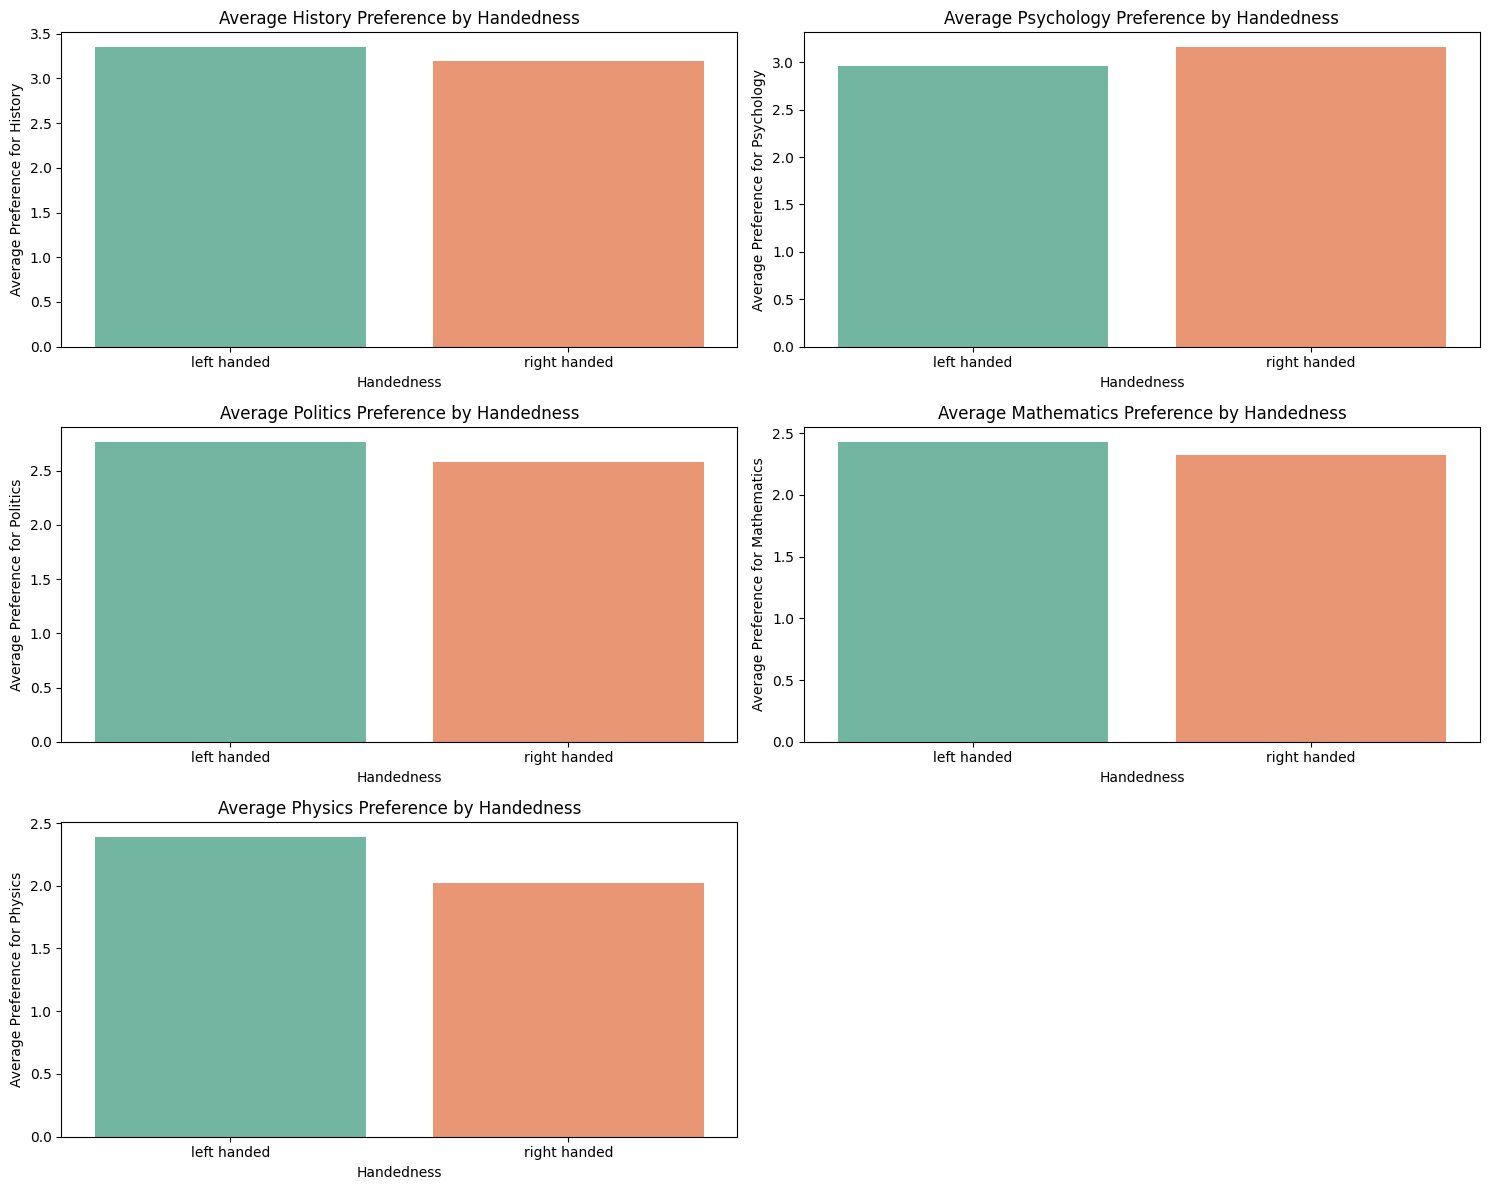

In [ ]:
# 1. Столбчатые диаграммы для среднего значения предпочтений (для одного признака)
plt.figure(figsize=(15, 12))

for i, col in enumerate(selected_prefs):
    mean_preferences = preferences.groupby('Handedness')[col].mean().reset_index()
    plt.subplot(3, 2, i + 1)  # Создание сетки подграфиков 2x5
    sns.barplot(data=mean_preferences, x='Handedness', y=col, palette='Set2')
    plt.title(f'Average {col} Preference by Handedness')
    plt.ylabel(f'Average Preference for {col}')
    plt.xlabel('Handedness')

plt.tight_layout()  # Упаковка графиков
plt.show()  # Показать графики

In [ ]:
selected_prefs = preferences.columns[6:10]

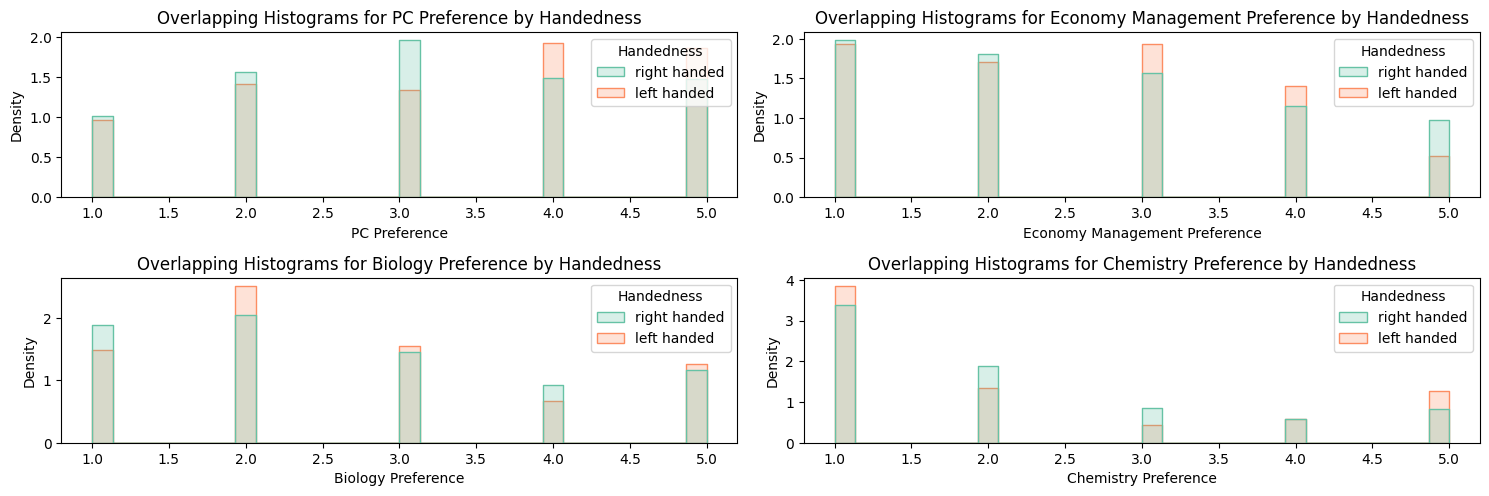

In [ ]:
# 2. Суперпозиция гистограмм для выбранных предпочтений
plt.figure(figsize=(15, 12))

for i, col in enumerate(selected_prefs):
    plt.subplot(5, 2, i + 1)
    sns.histplot(data=preferences, x=col, hue='Handedness', element='step', stat='density', common_norm=False, palette='Set2', bins=30)
    plt.title(f'Overlapping Histograms for {col} Preference by Handedness')
    plt.xlabel(f'{col} Preference')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Особых различий на базе первых 10 признаков с помощью гистограмм выявлено не было

In [ ]:
selected_prefs = preferences.columns[10:15]

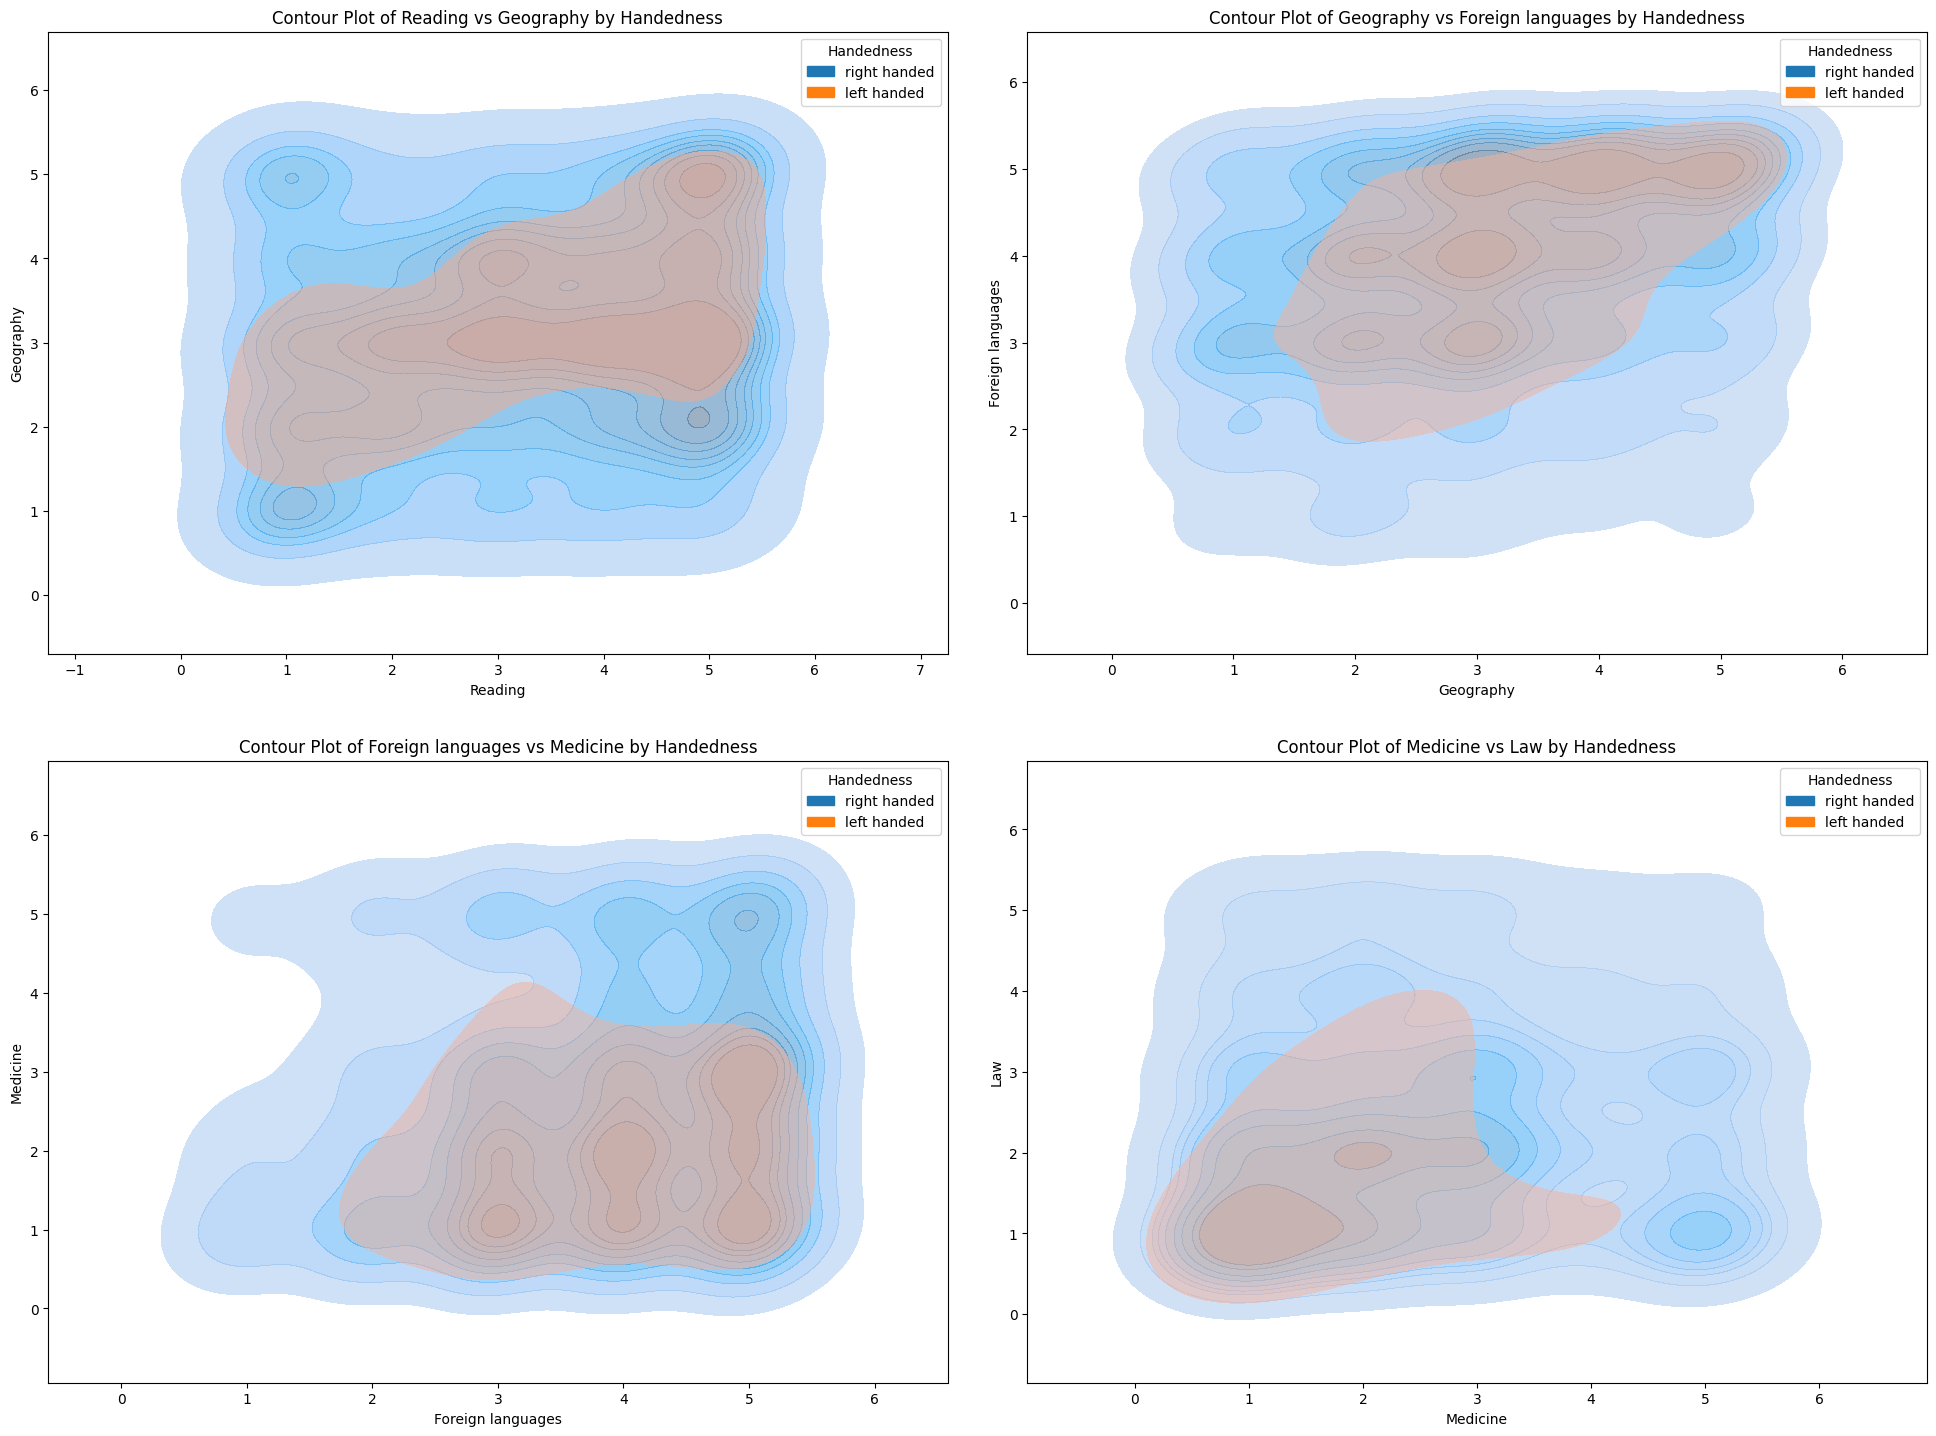

In [ ]:
plt.figure(figsize=(20, 15))

# Генерация графиков с контуром для выбранных предпочтений
for i in range(len(selected_prefs) - 1):
    plt.subplot(2, 2, i + 1)  # Создание сетки подграфиков 2x2
    sns.kdeplot(data=preferences, x=selected_prefs[i], y=selected_prefs[i + 1],
                hue='Handedness', fill=True, alpha=0.5)
    plt.title(f'Contour Plot of {selected_prefs[i]} vs {selected_prefs[i + 1]} by Handedness')
    plt.xlabel(selected_prefs[i])
    plt.ylabel(selected_prefs[i + 1])

plt.tight_layout(pad=3.0)  # Увеличьте отступы между подграфиками
plt.show()  # Показать графики

За исключением того, что данных для тепловой карты у леворуких куда меньше, чем у праворуких, сильных девиаций у леворуких не наблюдается: их интересы несильно расходятся с интересами праворуких.

In [ ]:
df_one_hot = df.copy()
df_ordinal = df.copy()

# Идентификация категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns

# Применение OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df_one_hot[categorical_cols])

# Создание DataFrame с закодированными признаками
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Объединение с оригинальным DataFrame без категориальных признаков
df_one_hot = df_one_hot.drop(categorical_cols, axis=1)
df_one_hot = pd.concat([df_one_hot.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)

# Применение OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df_ordinal[categorical_cols])

# Создание DataFrame с закодированными признаками
ordinal_df = pd.DataFrame(ordinal_encoded, columns=categorical_cols)

# Объединение с оригинальным DataFrame без категориальных признаков
df_ordinal = df_ordinal.drop(categorical_cols, axis=1)
df_ordinal = pd.concat([df_ordinal.reset_index(drop=True), ordinal_df.reset_index(drop=True)], axis=1)

DataFrame с One-Hot кодированием:
   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...  Education_masters degree  \
0      1.0  5.0   5.0                1.0  ...                       0.0   
1      2.0  3.0   5.0                4.0  ...                       0.0   
2      5.0  3.0   5.0                3.0  ...                       0.0   
3      1.0  2.0   2.0                1.0  ...                       0.0   
4      3.0  5.0   3.0                1.0  ...                       0.0   

   Education_primary school  Education_secondary sch

Применим OneHot-кодирование и Ordinal-кодирование, а затем построим матрицу корелляции.
OneHot-кодирование заменяет один категориальный признак на несколько бинарных, а Ordinal-кодирование — на один числовой.

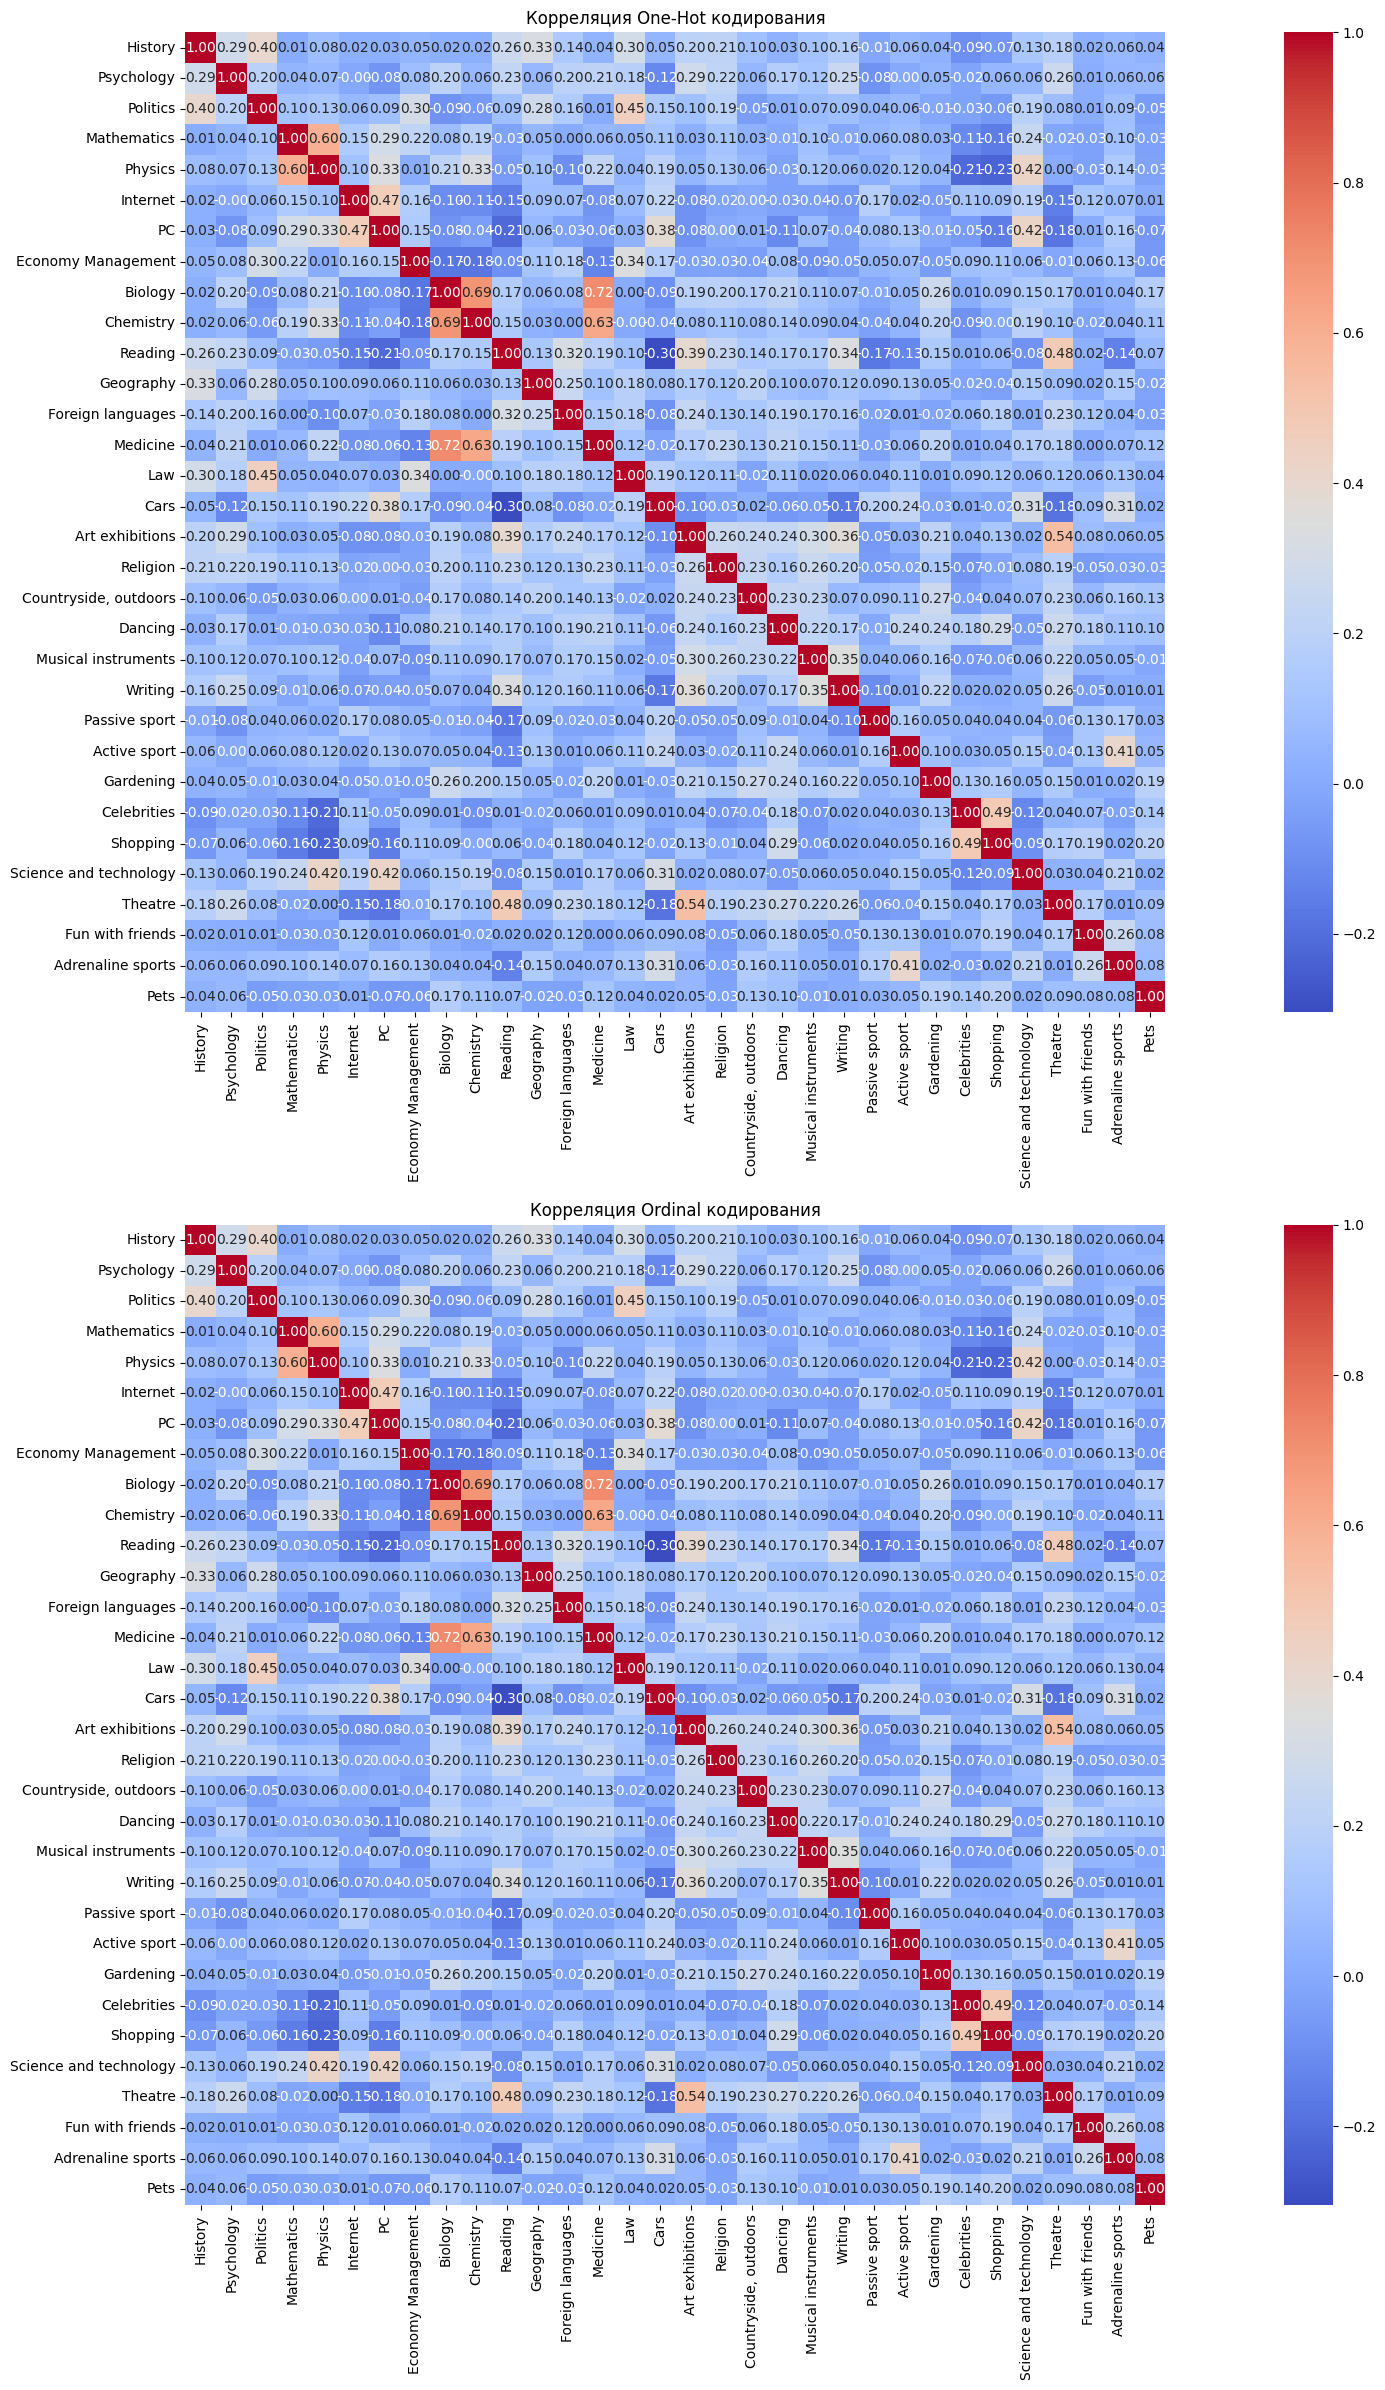

In [ ]:
# Создание копий DataFrame
preferences = df.iloc[:, 31:31+32]

df_one_hot = preferences.copy()
df_ordinal = preferences.copy()

# Идентификация категориальных признаков
categorical_cols = preferences.select_dtypes(include=['object']).columns

# Применение OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df_one_hot[categorical_cols])

# Создание DataFrame с закодированными признаками
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Объединение с оригинальным DataFrame без категориальных признаков
df_one_hot = df_one_hot.drop(categorical_cols, axis=1)
df_one_hot = pd.concat([df_one_hot.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)

# Применение OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df_ordinal[categorical_cols])

# Создание DataFrame с закодированными признаками
ordinal_df = pd.DataFrame(ordinal_encoded, columns=categorical_cols)

# Объединение с оригинальным DataFrame без категориальных признаков
df_ordinal = df_ordinal.drop(categorical_cols, axis=1)
df_ordinal = pd.concat([df_ordinal.reset_index(drop=True), ordinal_df.reset_index(drop=True)], axis=1)

# Нахождение корреляции для DataFrame с One-Hot кодированием
correlation_one_hot = df_one_hot.corr()
# print("Корреляционная матрица для One-Hot кодированного DataFrame:")
# print(correlation_one_hot)

# Нахождение корреляции для DataFrame с Ordinal кодированием
correlation_ordinal = df_ordinal.corr()
# print("\nКорреляционная матрица для Ordinal кодированного DataFrame:")
# print(correlation_ordinal)

plt.figure(figsize=(24, 24))

plt.subplot(2, 1, 1)
sns.heatmap(correlation_one_hot, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Корреляция One-Hot кодирования')

plt.subplot(2, 1, 2)
sns.heatmap(correlation_ordinal, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Корреляция Ordinal кодирования')

plt.tight_layout()
plt.show()

Таким образом, с помощью графиков выше не было выявлено явных отличий в интересах левшей от интересов правшей.